# Predict Stock Market Price

### Problem Statement
- This dataset is created to prediction of the S&P 500 Stock index based on interest rates and employment numbers.

# Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Import Dataset

In [2]:
dataset = pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
dataset.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


# Step 3: Visulize the Dataset

In [4]:
dataset.columns

Index(['Interest Rates', 'Employment', 'S&P 500 Price'], dtype='object')

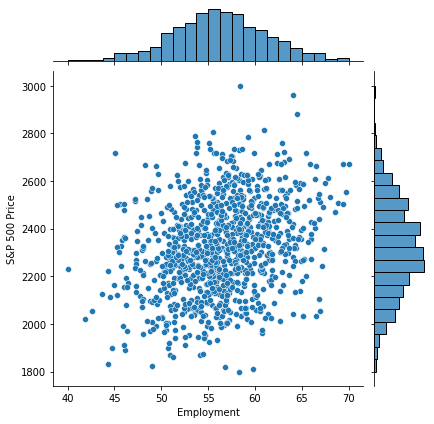

In [5]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=dataset)

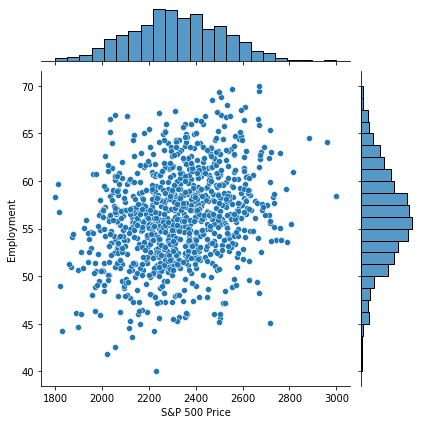

In [6]:
sns.jointplot(y='Employment', x='S&P 500 Price', data=dataset)

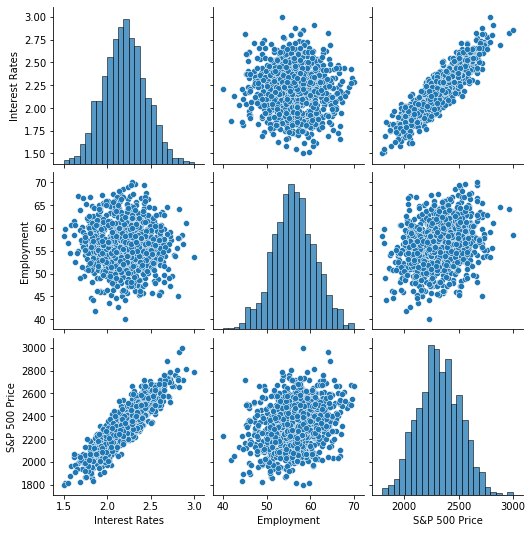

In [7]:
sns.pairplot(dataset)

# Step 4 : Create Training And Testing data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = dataset[['Interest Rates', 'Employment']]
y = dataset['S&P 500 Price']

In [10]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [11]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
X_train

,Interest Rates,Employment
944,2.292148,51.724763
2,2.215863,57.414687
30,2.346574,60.244852
896,2.596025,45.229757
614,2.008913,65.982039
...,...,...
491,1.500000,58.323993
849,2.099546,57.811870
848,2.036101,57.563727
857,1.619746,58.498320


# Step 5 : Training The Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linearRegression = LinearRegression(fit_intercept=True)

In [16]:
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Linear Model Coefficients (m) : ', linearRegression.coef_)
print('Linear Model Coefficients (b) : ', linearRegression.intercept_)

Linear Model Coefficients (m) :  [734.17951714  12.3207178 ]
Linear Model Coefficients (b) :  16.01938281600178


# Step 6 : Evaluate The Model

In [18]:
y_predict = linearRegression.predict(X_test)

In [19]:
y_predict

array([2170.78153302, 2178.54345272, 2633.64546124, 2475.1019745 ,
       2171.64974329, 2339.93682183, 2215.25253751, 2179.81147624,
       2092.96121985, 2334.72526561, 2903.89935361, 2163.3794031 ,
       2368.39638362, 2284.0410574 , 2342.10545018, 2269.59953706,
       2423.56087667, 2356.01869452, 2348.23020608, 2186.36546738,
       2362.37527586, 2505.52478052, 1972.56777136, 2062.12336536,
       2397.14438973, 2219.47043817, 2643.95406401, 2549.29870867,
       2209.53634477, 2345.84964883, 2613.98929532, 2229.76978979,
       2465.12760384, 2252.40785456, 1993.93129375, 2355.8749575 ,
       2512.96827789, 2059.86540641, 2326.28617374, 2250.54849084,
       2173.55879698, 2487.624377  , 2260.71495256, 2506.78458133,
       2309.91126608, 2448.72728418, 2005.37211288, 2421.04825528,
       2586.17971398, 2371.63868139, 2098.21204639, 2596.9509996 ,
       2462.56332477, 2424.01796794, 2351.62680392, 2232.66888654,
       2402.63499656, 2035.19714094, 2294.20899707, 2499.03584

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

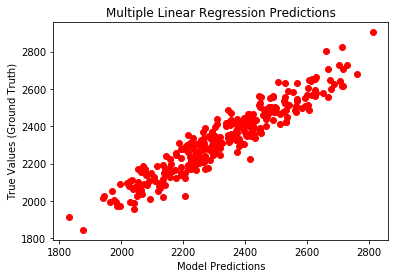

In [20]:
plt.scatter(y_test, y_predict, color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from numpy import sqrt, abs

In [38]:
k = X_test.shape[1]
n = len(X_test)

In [39]:
k

2

In [40]:
n

300

In [41]:
RMSE = float(format(sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean(abs(y_test, y_predict) / y_test ) * 100

In [43]:
print('RMSE', RMSE)
print('MSE', MSE)
print('MAE', MAE)
print('r2', r2)
print('adj_r2', adj_r2)
print('MAPE', MAPE)

RMSE 60.375
MSE 3645.1769264760846
MAE 48.65076094886938
r2 0.8991349955785335
adj_r2 0.8984557699595337
MAPE 100.0


# Step 7 : Visualize the Results

In [44]:
from mpl_toolkits.mplot3d import Axes3D

In [50]:
X_surf, y_surf = np.meshgrid(np.linspace(
    dataset['Interest Rates'].min(), dataset['Interest Rates'].max(), 
    dataset['Employment'].min(), dataset['Employment'].max()
), 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
onlyX = pd.DataFrame({ 'Interest Rates': X_surf.ravel(), 'Employment': y_surf.ravel() })

In [53]:
onlyX.shape

(40, 2)

In [54]:
fittedY = linearRegression.predict(onlyX)

In [55]:
fittedY

array([2349.36043883, 2377.59811257, 2405.83578631, 2434.07346004,
       2462.31113378, 2490.54880752, 2518.78648125, 2547.02415499,
       2575.26182872, 2603.49950246, 2631.7371762 , 2659.97484993,
       2688.21252367, 2716.4501974 , 2744.68787114, 2772.92554488,
       2801.16321861, 2829.40089235, 2857.63856609, 2885.87623982,
       2914.11391356, 2942.35158729, 2970.58926103, 2998.82693477,
       3027.0646085 , 3055.30228224, 3083.53995598, 3111.77762971,
       3140.01530345, 3168.25297718, 3196.49065092, 3224.72832466,
       3252.96599839, 3281.20367213, 3309.44134587, 3337.6790196 ,
       3365.91669334, 3394.15436707, 3422.39204081, 3450.62971455])

In [56]:
fittedY.shape

(40,)

In [57]:
fittedY = fittedY.reshape(X_surf.shape)

In [58]:
fittedY.shape

(1, 40)

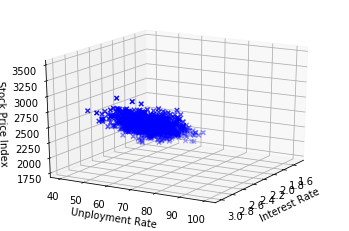

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( dataset['Interest Rates'], dataset['Employment'], dataset['S&P 500 Price'], c = 'blue', marker='x' )
ax.plot_surface(X_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Unployment Rate')
ax.set_zlabel('Stock Price Index')
ax.view_init(20, 30)
plt.show()

In [62]:
coeff_df = pd.DataFrame(linearRegression.coef_, X.columns, columns=['Coefficient'])

In [63]:
coeff_df

,Coefficient
Interest Rates,734.179517
Employment,12.320718
